In [40]:
import pandas as pd
import numpy as np
import imblearn
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

<Axes: xlabel='target', ylabel='count'>

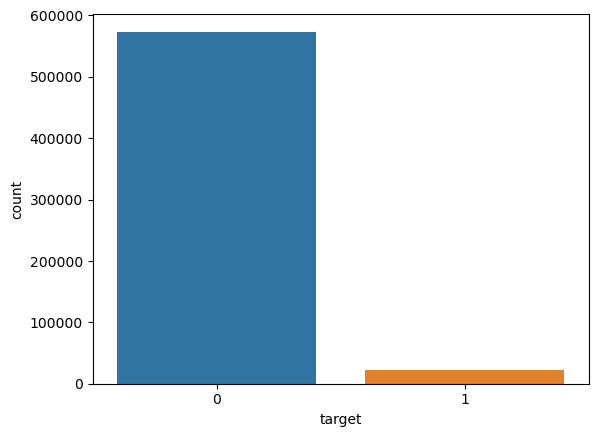

In [4]:
sns.countplot(x=data['target'])

In [5]:
data.groupby('target')['id'].count()

target
0    573518
1     21694
Name: id, dtype: int64

In [6]:
data.groupby('target')['id'].count() / len(data)

target
0    0.963552
1    0.036448
Name: id, dtype: float64

In [7]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
x = data.iloc[:, 2:]
x.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [12]:
y = data['target']

In [13]:
cat_col = [cat for cat in x.columns if 'cat' in cat]
cat_col

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [14]:
cat_col = [i for i in range(0, len(x.columns)) if 'cat' in x.columns[i]]
cat_col

[1, 3, 4, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [19]:
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10)

In [20]:
model.fit(x_train, y_train, cat_col, eval_set=(x_test, y_test))

0:	learn: 0.9634528	test: 0.9638515	best: 0.9638515 (0)	total: 534ms	remaining: 52.9s
10:	learn: 0.9634528	test: 0.9638515	best: 0.9638515 (0)	total: 3.59s	remaining: 29s
20:	learn: 0.9634528	test: 0.9638515	best: 0.9638515 (0)	total: 6.52s	remaining: 24.5s
30:	learn: 0.9634528	test: 0.9638515	best: 0.9638515 (0)	total: 9.7s	remaining: 21.6s
40:	learn: 0.9634528	test: 0.9638515	best: 0.9638515 (0)	total: 12.8s	remaining: 18.4s
50:	learn: 0.9634774	test: 0.9638515	best: 0.9638583 (49)	total: 15.8s	remaining: 15.2s
60:	learn: 0.9634842	test: 0.9638448	best: 0.9638583 (49)	total: 18.8s	remaining: 12s
70:	learn: 0.9634954	test: 0.9638583	best: 0.9638583 (49)	total: 21.9s	remaining: 8.95s
80:	learn: 0.9634954	test: 0.9638448	best: 0.9638583 (49)	total: 24.9s	remaining: 5.84s
90:	learn: 0.9634976	test: 0.9638515	best: 0.9638583 (49)	total: 28.2s	remaining: 2.79s
99:	learn: 0.9634976	test: 0.9638515	best: 0.9638583 (49)	total: 31.2s	remaining: 0us

bestTest = 0.9638582555
bestIteration = 49



In [21]:
y_pred = model.predict(x_test)

In [23]:
cm =  confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[143424,      0],
       [  5378,      1]], dtype=int64)

In [25]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143424
           1       1.00      0.00      0.00      5379

    accuracy                           0.96    148803
   macro avg       0.98      0.50      0.49    148803
weighted avg       0.97      0.96      0.95    148803



In [30]:
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(x, y)

In [31]:
np.shape(x_rus)

(43388, 57)

In [32]:
np.shape(y_rus)

(43388,)

In [33]:
np.unique(y_rus)

array([0, 1], dtype=int64)

In [34]:
np.unique(y_rus, return_counts=True)

(array([0, 1], dtype=int64), array([21694, 21694], dtype=int64))

In [35]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([573518,  21694], dtype=int64))

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus)
model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10)
model.fit(x_train, y_train, cat_col, eval_set=(x_test, y_test))

0:	learn: 0.5817584	test: 0.5674380	best: 0.5674380 (0)	total: 92.5ms	remaining: 27.6s
10:	learn: 0.5925448	test: 0.5809901	best: 0.5825574 (7)	total: 1.06s	remaining: 27.8s
20:	learn: 0.5976768	test: 0.5853231	best: 0.5862450 (18)	total: 1.98s	remaining: 26.3s
30:	learn: 0.6008727	test: 0.5862450	best: 0.5863372 (26)	total: 2.9s	remaining: 25.2s
40:	learn: 0.6043146	test: 0.5867982	best: 0.5867982 (38)	total: 3.98s	remaining: 25.2s
50:	learn: 0.6086168	test: 0.5887342	best: 0.5887342 (47)	total: 4.9s	remaining: 23.9s
60:	learn: 0.6117206	test: 0.5892874	best: 0.5903015 (57)	total: 5.76s	remaining: 22.6s
70:	learn: 0.6137795	test: 0.5904858	best: 0.5907624 (63)	total: 6.71s	remaining: 21.6s
80:	learn: 0.6155926	test: 0.5889186	best: 0.5907624 (63)	total: 7.77s	remaining: 21s
90:	learn: 0.6189423	test: 0.5891952	best: 0.5907624 (63)	total: 8.71s	remaining: 20s
100:	learn: 0.6220768	test: 0.5888264	best: 0.5909468 (93)	total: 9.62s	remaining: 19s
110:	learn: 0.6251498	test: 0.5890108	bes

In [37]:
y_pred = model.predict(x_test)

In [38]:
cm =  confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[3317, 2032],
       [2391, 3107]], dtype=int64)

In [39]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60      5349
           1       0.60      0.57      0.58      5498

    accuracy                           0.59     10847
   macro avg       0.59      0.59      0.59     10847
weighted avg       0.59      0.59      0.59     10847



In [42]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)

In [43]:
np.unique(y_ros, return_counts=True)

(array([0, 1], dtype=int64), array([573518, 573518], dtype=int64))

In [44]:
del x
del y
del x_rus
del y_rus
del data
del x_train
del x_test
del y_train
del y_test
del model

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros)
model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10)
model.fit(x_train, y_train, cat_col, eval_set=(x_test, y_test))

0:	learn: 0.5793483	test: 0.5805921	best: 0.5805921 (0)	total: 1.8s	remaining: 8m 57s
10:	learn: 0.5985514	test: 0.6004589	best: 0.6004589 (10)	total: 17.2s	remaining: 7m 31s
20:	learn: 0.6166932	test: 0.6187216	best: 0.6187216 (20)	total: 32.9s	remaining: 7m 17s
30:	learn: 0.6491584	test: 0.6527398	best: 0.6527398 (30)	total: 47.3s	remaining: 6m 50s
40:	learn: 0.6649649	test: 0.6709188	best: 0.6709188 (40)	total: 1m 1s	remaining: 6m 30s
50:	learn: 0.6717894	test: 0.6777189	best: 0.6778654 (49)	total: 1m 18s	remaining: 6m 24s
60:	learn: 0.6776469	test: 0.6838181	best: 0.6838181 (60)	total: 1m 36s	remaining: 6m 18s
70:	learn: 0.6825220	test: 0.6896453	best: 0.6898441 (69)	total: 1m 52s	remaining: 6m 4s
80:	learn: 0.6904009	test: 0.6982239	best: 0.6982239 (80)	total: 2m 9s	remaining: 5m 48s
90:	learn: 0.6973603	test: 0.7058819	best: 0.7058819 (90)	total: 2m 24s	remaining: 5m 31s
100:	learn: 0.7018739	test: 0.7105688	best: 0.7105688 (100)	total: 2m 40s	remaining: 5m 16s
110:	learn: 0.7069

In [46]:
y_pred = model.predict(x_test)

In [47]:
cm =  confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[109822,  33555],
       [ 27294, 116088]], dtype=int64)

In [48]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78    143377
           1       0.78      0.81      0.79    143382

    accuracy                           0.79    286759
   macro avg       0.79      0.79      0.79    286759
weighted avg       0.79      0.79      0.79    286759

